<a href="https://colab.research.google.com/github/sandhyaparna/Python-DataScience-CookBook/blob/master/Modeling/MissingValues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install impyute
!pip install datawig
!pip install missingpy 

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import io
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)

In [4]:
### Missing data representation - np.NAN, pd.NaT
# Infinity inf is represented as np.inf
# -Infinity -inf is represented as -np.inf
# https://pandas.pydata.org/pandas-docs/stable/missing_data.html
# Missing data of objects - None or NaN (NaN and None are used interchangebly)
# Missing data of Numeric data - Alwayz NaN
# Missing data of DateTime data - Alwayz NaT


In [5]:
from google.colab import files
uploaded = files.upload()

In [6]:
# specifying which ones are to be considered as missing values
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
Employees = pd.read_csv("employees.csv", na_values = missing_value_formats)

In [7]:
# Adding time variable - generate random dates
# pd.date_range(start='1990-01-01',end='2000-12-31') creates all dates between the selected range
# np.random.choice chooses dates randomly from the above for the mentioned number of times
# range(Employees.shape[0]) chooses dates for 1000 times i.e number of rows in Employees table
Employees['Date_of_Birth'] = [np.random.choice(pd.date_range(start='1990-01-01',end='2000-12-31')) for i in range(Employees.shape[0])]

Employees['col_date'] = [np.random.choice(pd.date_range(start='1990-01-01',end='2000-12-31')) for i in range(Employees.shape[0])]
# Set 20% of date variable data to missing
Employees.loc[np.random.randint(0,1000, size=Employees.shape[0]//5),'col_date'] = np.nan

# Generates random integers between 100 & 10000
Employees['col_int'] = np.random.randint(100,10001, size=Employees.shape[0]) 
# set few rows (10% rows) of col_int to missing values
Employees.loc[np.random.randint(0,1000, size=Employees.shape[0]//10),'col_int'] = np.nan

# Generates floating values between 0 & 1
Employees['col_float'] = np.random.random(size=Employees.shape[0])
# set few rows (5% rows) of col_int to missing values
Employees.loc[np.random.randint(0,1000, size=Employees.shape[0]//20),'col_float'] = np.nan


In [8]:
print(np.random.randn(24))

[-0.26974697 -0.90660629 -1.17093009 -1.87655577  1.38064731 -0.29642181
 -1.58887162  0.78707445 -0.58734967 -1.37470288  0.83942947  1.11546688
 -0.21657583 -0.75485804 -0.34893156  0.97397485  1.67696856  1.56383529
 -0.91561964  0.45639218  0.6799377  -0.35082959  2.50686679 -1.68466029]


In [9]:
Employees.head()

,First Name,Gender,Salary,Bonus %,Senior Management,Team,Date_of_Birth,col_date,col_int,col_float
0,Douglas,Male,97308.0,6.945,True,Marketing,1990-10-19,1994-03-01,NaN,0.139211
1,Thomas,Male,61933.0,NaN,True,NaN,2000-07-30,1992-11-30,1774.0,0.923773
2,Maria,Female,130590.0,11.858,False,Finance,1999-06-22,1999-01-08,1008.0,0.733971
3,Jerry,Male,NaN,9.340,True,Finance,1990-01-29,1990-04-23,4581.0,0.670253
4,Larry,Male,101004.0,1.389,True,Client Services,1994-11-15,1990-01-12,6336.0,0.177167


In [10]:
print("Number of missing values in each column","\n",Employees.isnull().sum())

print("Percentage of missing values in each column","\n",Employees.isnull().sum() * 100 / len(Employees))

print("Number of missing values in each row (for first 5 rows)","\n",Employees.isnull().sum(axis=1).head(5))

# print(Employees.describe(include='all',datetime_is_numeric=True))
print(Employees.describe(include='all'))

Number of missing values in each column 
 First Name            70
Gender               149
Salary                 5
Bonus %                4
Senior Management     71
Team                  48
Date_of_Birth          0
col_date             183
col_int               94
col_float             49
dtype: int64
Percentage of missing values in each column 
 First Name            7.0
Gender               14.9
Salary                0.5
Bonus %               0.4
Senior Management     7.1
Team                  4.8
Date_of_Birth         0.0
col_date             18.3
col_int               9.4
col_float             4.9
dtype: float64
Number of missing values in each row (for first 5 rows) 
 0    1
1    2
2    0
3    1
4    0
dtype: int64
       First Name  Gender         Salary     Bonus % Senior Management  \
count         930     851     995.000000  996.000000               929   
unique        200       2            NaN         NaN                 2   
top       Marilyn  Female            NaN      

In [11]:
MissingCount = Employees.isnull().sum().sort_values(ascending=False)
MissingPercent = (Employees.isnull().sum() * 100/Employees.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([MissingCount, MissingPercent], axis=1, keys=['MissingCount', 'MissingPercent'])
missing_data.reset_index(inplace=True)
missing_data
# Data is ordered by missing %

,index,MissingCount,MissingPercent
0,col_date,183,18.3
1,Gender,149,14.9
2,col_int,94,9.4
3,Senior Management,71,7.1
4,First Name,70,7.0
5,col_float,49,4.9
6,Team,48,4.8
7,Salary,5,0.5
8,Bonus %,4,0.4
9,Date_of_Birth,0,0.0


In [12]:
# Get list of column names that have missing values
Employees_miss = Employees[[col for col in Employees.columns if Employees[col].isnull().any()]]
list(Employees_miss) # Date_of_Birth var will not be here as it doesn't have any missing values

['First Name',
 'Gender',
 'Salary',
 'Bonus %',
 'Senior Management',
 'Team',
 'col_date',
 'col_int',
 'col_float']

Text(0.5, 1.0, 'Percent missing data by feature')

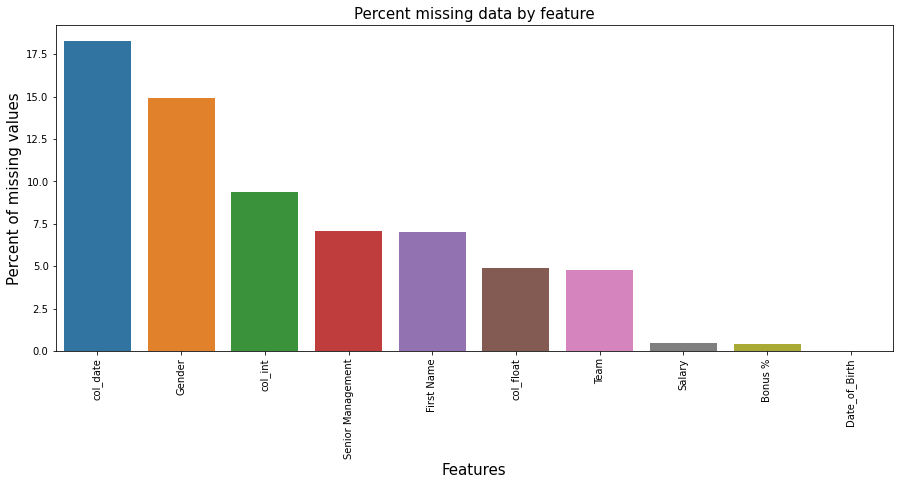

In [13]:
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data['index'], y=missing_data['MissingPercent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [14]:
import plotly.graph_objects as go
import plotly.express as px
fig = px.bar(missing_data, x='index', y='MissingPercent',hover_data=['MissingCount'],
             color='MissingCount',labels={'index':'variables'})
fig.show()

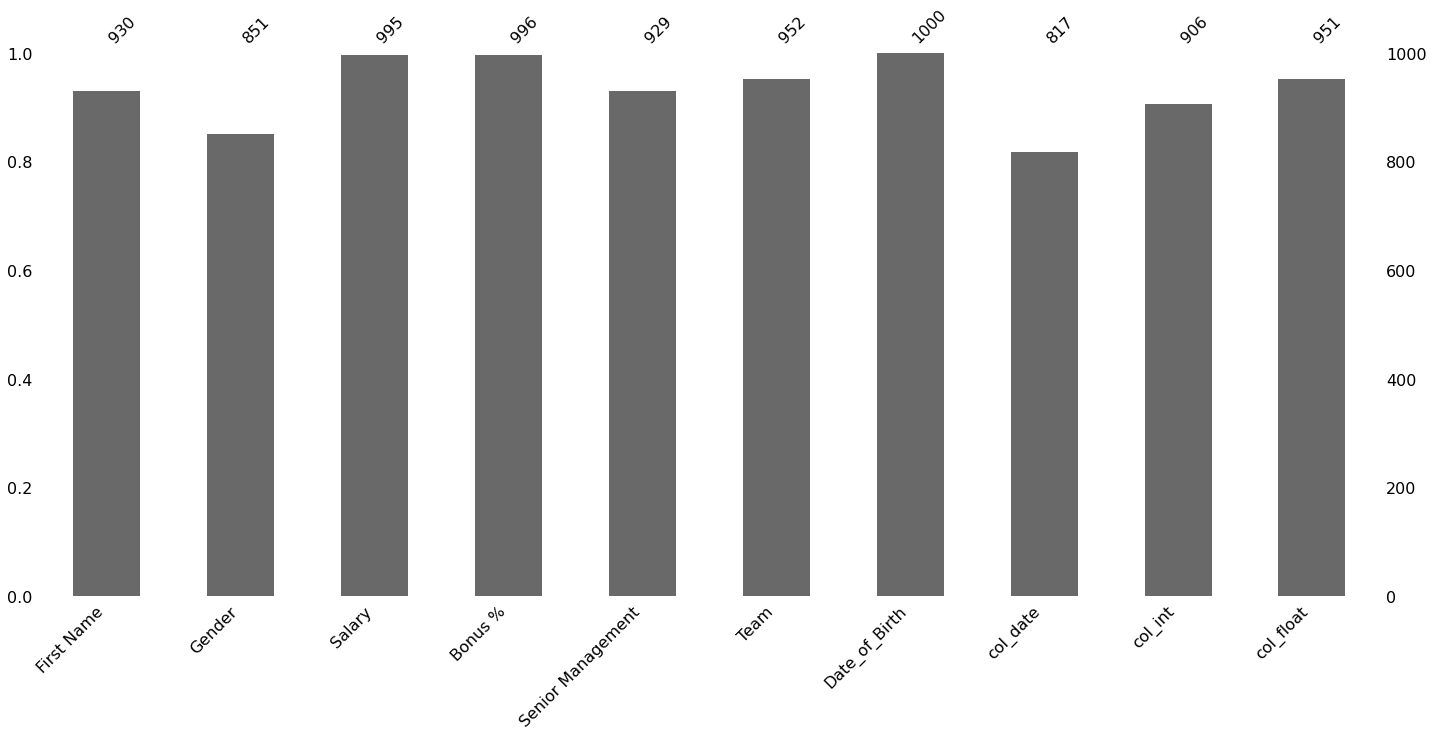

In [15]:
import missingno as msno
msno.bar(Employees)

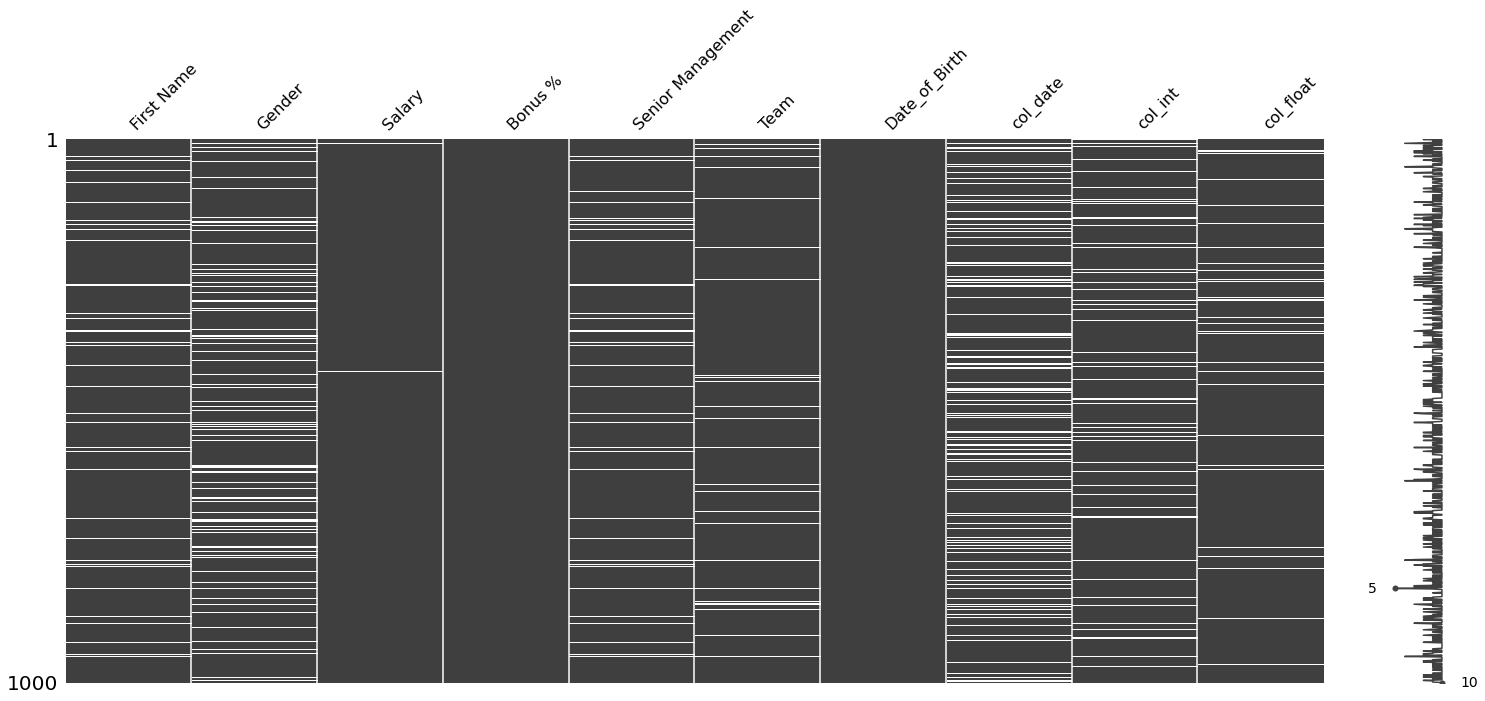

In [16]:
# To see if there are any patterns in missing values 
msno.matrix(Employees)

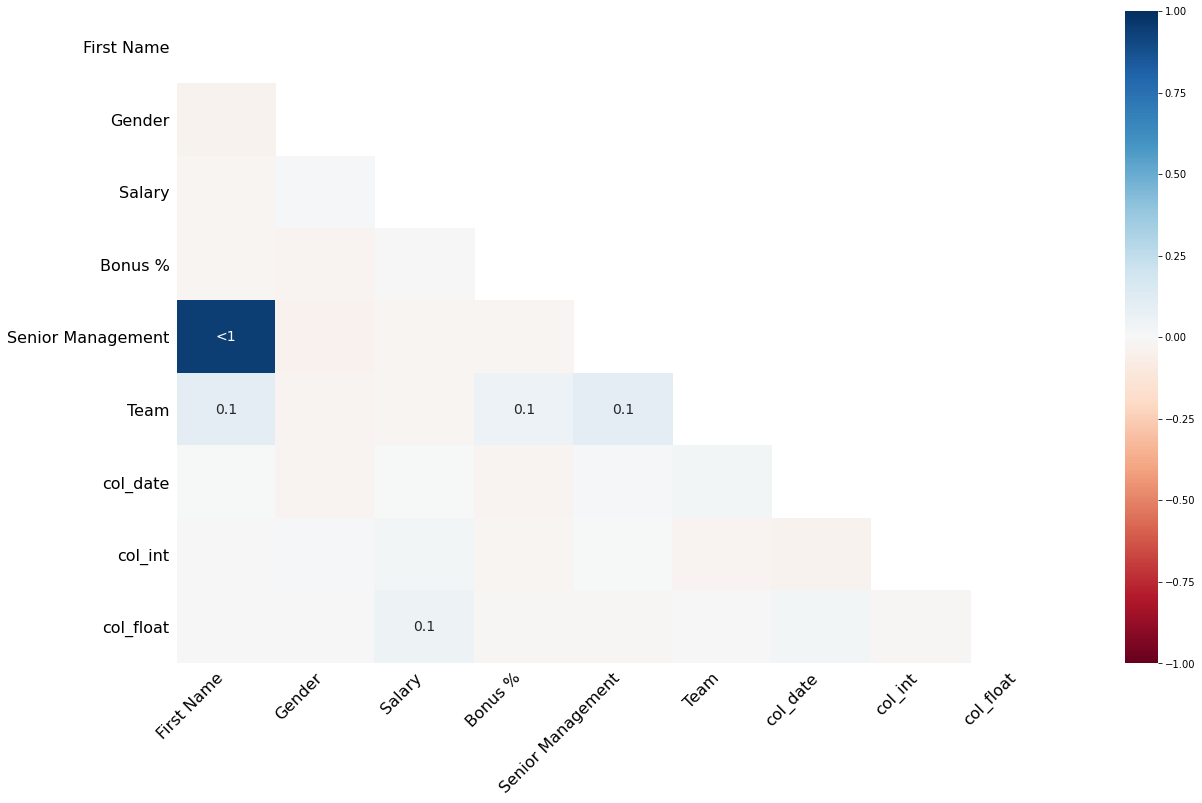

In [17]:
# Measures nullity correlation
msno.heatmap(Employees)

### Remove rows that have missing values

In [18]:
# drop all rows with atleast one NaN
Employees_rows_Atleast1missing = Employees.dropna(axis = 0, how ='any')  
print(Employees_rows_Atleast1missing.shape)

# drop all rows with all NaN
Employees_rows_Allmiss = Employees.dropna(axis = 0, how ='all')
print(Employees_rows_Allmiss.shape)

# Drop rows that have missing values in a particular var
Employees_rows_Var = Employees.dropna(subset=['col_date'],how='any')
print(Employees_rows_Var.shape)

(517, 10)
(1000, 10)
(817, 10)


### Remove variables that have missing values

In [19]:
# drop all columns with atleast one NaN
Employees_cols_Atleast1missing = Employees.dropna(axis = 1, how ='any')
print(Employees_cols_Atleast1missing.shape)

# drop all columns with all NaN
Employees_cols_Allmiss = Employees.dropna(axis = 1, how ='all')
print(Employees_cols_Allmiss.shape)

# Drop specific columns
Employees_cols_Var = Employees.drop(['col_date'],axis=1)
print(Employees_cols_Var.shape)

(1000, 1)
(1000, 10)
(1000, 9)


### Impute missing values using a constant value

In [20]:
# df['Salary'].fillna(0, inplace=True)
Employees['Salary_Fill0'] = Employees['Salary'].fillna(0)
Employees['Gender_FillNoGender'] = Employees['Gender'].fillna('No Gender')

### Impute missing values using Mean, Median or Mode

In [21]:
# On all variables same kind of imputation - gives Matrix
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
numerical_features = Employees.select_dtypes(include = np.number)
# imp_mean.fit(numerical_features)
# SimpleImputer()
# Employees_NumericalVars_Mean = imp_mean.transform(numerical_features)
# imp_mean.fit_transform(numerical_features) produces a matrix
# converting matrix to dataframe
Employees_NumericalVars_Mean = pd.DataFrame(imp_mean.fit_transform(numerical_features), columns = numerical_features.columns)
Employees_NumericalVars_Mean.head()

,Salary,Bonus %,col_int,col_float,Salary_Fill0
0,97308.000000,6.945000,4925.07064,0.139211,97308.0
1,61933.000000,10.215586,1774.00000,0.923773,61933.0
2,130590.000000,11.858000,1008.00000,0.733971,130590.0
3,90522.329648,9.340000,4581.00000,0.670253,0.0
4,101004.000000,1.389000,6336.00000,0.177167,101004.0


In [22]:
# Impute a var using mean, median, mode
Employees['Salary_FillMean'] = Employees['Salary'].fillna(Employees['Salary'].mean())
Employees['Salary_FillMedian'] = Employees['Salary'].fillna(Employees['Salary'].median())

# Impute a var using groupby of other column
# var used in groupby should not contain missing values
Employees['Salary_GenderGroup'] = Employees.groupby("Gender_FillNoGender")['Salary'].transform(lambda x: x.fillna(x.median()))
# To manipulate original var
# Employees['Salary'] = Employees.groupby("Gender_FillNoGender").transform(lambda x: x.fillna(x.median()))

Employees['Gender_FillMode'] = Employees['Gender'].fillna(Employees['Gender'].mode()[0])

In [23]:
Employees['Gender'].mode()

0    Female
dtype: object

### Fill missing values using previous or next value


In [24]:
# ffill or pad (from previous row)
Employees['Salary_ForwardFill'] = Employees['Salary'].fillna(method='pad')
# To limit the amount of filling NAs
Employees['Salary_ForwardFillLimit'] = Employees['Salary'].fillna(method='pad', limit=1)
# filling NAs based on groups of another column
Employees['Salary_ForwardFillVar'] = Employees.groupby(['Gender'])['Salary'].ffill()

# backfill (from next row)
Employees['Salary_BackFill'] = Employees['Salary'].fillna(method='bfill')
# filling NAs based on groups of another column
Employees['Salary_BackwardFillVar'] = Employees.groupby(['Gender'])['Salary'].bfill()

### Replacing with average of previous and next value

In [25]:
Employees['Salary_fFill_bFill_Avg'] = pd.concat([Employees['Salary'].ffill(), Employees['Salary'].bfill()]).groupby(level=0).mean()

### Using replace instead of fillna

In [26]:
Employees['Salary_replace'] = Employees['Salary'].replace(to_replace = np.nan, value = 0) #,inplace=True

### KNN Imputation
 https://www.youtube.com/watch?v=AHBHMQyD75U

* Below thing is different from KNNImputer </br>
def knn_impute(target, attributes, k_neighbors, aggregation_method="mean", numeric_distance="euclidean",
               categorical_distance="jaccard", missing_neighbors_threshold = 0.5):

    Replace the missing values within the target variable based on its k nearest neighbors identified with the
        attributes variables. If more than 50% of its neighbors are also missing values, the value is not modified and
        remains missing. If there is a problem in the parameters provided, returns None.
        If to many neighbors also have missing values, leave the missing value of interest unchanged.
        @params:
            - target                        = a vector of n values with missing values that you want to impute. The length has
                                              to be at least n = 3.
            - attributes                    = a data frame of attributes with n rows to match the target variable
            - k_neighbors                   = the number of neighbors to look at to impute the missing values. It has to be a
                                              value between 1 and n.
            - aggregation_method            = how to aggregate the values from the nearest neighbors (mean, median, mode)
                                              Default = "mean"
            - numeric_distances             = the metric to apply to continuous attributes.
                                              "euclidean" and "cityblock" available.
                                              Default = "euclidean"
            - categorical_distances         = the metric to apply to binary attributes.
                                              "jaccard", "hamming", "weighted-hamming" and "euclidean"
                                              available. Default = "jaccard"
            - missing_neighbors_threshold   = minimum of neighbors among the k ones that are not also missing to infer
                                              the correct value. Default = 0.5
        @returns:
            target_completed        = the vector of target values with missing value replaced. If there is a problem
                                      in the parameters, return None

In [27]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
numerical_features = Employees.select_dtypes(include = np.number)
# matrix is converted to dataframe
Employees_numerical_KNN = pd.DataFrame(imputer.fit_transform(numerical_features),columns = numerical_features.columns)
Employees_numerical_KNN.head()

,Salary,Bonus %,col_int,col_float,Salary_Fill0,Salary_FillMean,Salary_FillMedian,Salary_GenderGroup,Salary_ForwardFill,Salary_ForwardFillLimit,Salary_ForwardFillVar,Salary_BackFill,Salary_BackwardFillVar,Salary_fFill_bFill_Avg,Salary_replace
0,97308.0,6.945,4413.0,0.139211,97308.0,97308.000000,97308.0,97308.0,97308.0,97308.0,97308.0,97308.0,97308.0,97308.0,97308.0
1,61933.0,11.950,1774.0,0.923773,61933.0,61933.000000,61933.0,61933.0,61933.0,61933.0,61933.0,61933.0,61933.0,61933.0,61933.0
2,130590.0,11.858,1008.0,0.733971,130590.0,130590.000000,130590.0,130590.0,130590.0,130590.0,130590.0,130590.0,130590.0,130590.0,130590.0
3,82807.5,9.340,4581.0,0.670253,0.0,90522.329648,90370.0,89854.0,130590.0,130590.0,61933.0,101004.0,101004.0,115797.0,0.0
4,101004.0,1.389,6336.0,0.177167,101004.0,101004.000000,101004.0,101004.0,101004.0,101004.0,101004.0,101004.0,101004.0,101004.0,101004.0


In [28]:
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS
# start the KNN training
Employees_numerical_KNN = pd.DataFrame(data=fast_knn(numerical_features.values, k=30),columns = numerical_features.columns)
Employees_numerical_KNN.head()

,Salary,Bonus %,col_int,col_float,Salary_Fill0,Salary_FillMean,Salary_FillMedian,Salary_GenderGroup,Salary_ForwardFill,Salary_ForwardFillLimit,Salary_ForwardFillVar,Salary_BackFill,Salary_BackwardFillVar,Salary_fFill_bFill_Avg,Salary_replace
0,97308.000000,6.945000,4947.721942,0.139211,97308.0,97308.000000,97308.0,97308.0,97308.0,97308.0,97308.0,97308.0,97308.0,97308.0,97308.0
1,61933.000000,12.665537,1774.000000,0.923773,61933.0,61933.000000,61933.0,61933.0,61933.0,61933.0,61933.0,61933.0,61933.0,61933.0,61933.0
2,130590.000000,11.858000,1008.000000,0.733971,130590.0,130590.000000,130590.0,130590.0,130590.0,130590.0,130590.0,130590.0,130590.0,130590.0,130590.0
3,83863.619907,9.340000,4581.000000,0.670253,0.0,90522.329648,90370.0,89854.0,130590.0,130590.0,61933.0,101004.0,101004.0,115797.0,0.0
4,101004.000000,1.389000,6336.000000,0.177167,101004.0,101004.000000,101004.0,101004.0,101004.0,101004.0,101004.0,101004.0,101004.0,101004.0,101004.0


### MICE (Multivariate Imputation by Chained Equation)

In [29]:
from impyute.imputation.cs import mice
# start the MICE training (Can be applied to all numerical Vars that have missing info in datasets)
Employees_numerical_MICE = pd.DataFrame(data=mice(numerical_features.values),columns = numerical_features.columns)
Employees_numerical_MICE.head()

,Salary,Bonus %,col_int,col_float,Salary_Fill0,Salary_FillMean,Salary_FillMedian,Salary_GenderGroup,Salary_ForwardFill,Salary_ForwardFillLimit,Salary_ForwardFillVar,Salary_BackFill,Salary_BackwardFillVar,Salary_fFill_bFill_Avg,Salary_replace
0,97308.000000,6.945000,4845.07064,0.139211,97308.0,97308.000000,97308.0,97308.0,97308.0,97308.0,97308.0,97308.0,97308.0,97308.0,97308.0
1,61933.000000,9.444388,1774.00000,0.923773,61933.0,61933.000000,61933.0,61933.0,61933.0,61933.0,61933.0,61933.0,61933.0,61933.0,61933.0
2,130590.000000,11.858000,1008.00000,0.733971,130590.0,130590.000000,130590.0,130590.0,130590.0,130590.0,130590.0,130590.0,130590.0,130590.0,130590.0
3,82878.575423,9.340000,4581.00000,0.670253,0.0,90522.329648,90370.0,89854.0,130590.0,130590.0,61933.0,101004.0,101004.0,115797.0,0.0
4,101004.000000,1.389000,6336.00000,0.177167,101004.0,101004.000000,101004.0,101004.0,101004.0,101004.0,101004.0,101004.0,101004.0,101004.0,101004.0


In [ ]:
# from fancyimpute import IterativeImputer
# # calling the  MICE class 
# mice_imputer = IterativeImputer() 
# # imputing the missing value with mice imputer 
# # matrix is converted to dataframe
# Employees_numerical_MICE = pd.DataFrame(mice_imputer.fit_transform(numerical_features) ,columns = numerical_features.columns)
# Employees_numerical_MICE.head()

In [31]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
mice_imputer = IterativeImputer()
Employees['Salary_mice'] = mice_imputer.fit_transform(Employees[['Salary']])
Employees.head()

,First Name,Gender,Salary,Bonus %,Senior Management,Team,Date_of_Birth,col_date,col_int,col_float,Salary_Fill0,Gender_FillNoGender,Salary_FillMean,Salary_FillMedian,Salary_GenderGroup,Gender_FillMode,Salary_ForwardFill,Salary_ForwardFillLimit,Salary_ForwardFillVar,Salary_BackFill,Salary_BackwardFillVar,Salary_fFill_bFill_Avg,Salary_replace,Salary_mice
0,Douglas,Male,97308.0,6.945,True,Marketing,1990-10-19,1994-03-01,NaN,0.139211,97308.0,Male,97308.000000,97308.0,97308.0,Male,97308.0,97308.0,97308.0,97308.0,97308.0,97308.0,97308.0,97308.000000
1,Thomas,Male,61933.0,NaN,True,NaN,2000-07-30,1992-11-30,1774.0,0.923773,61933.0,Male,61933.000000,61933.0,61933.0,Male,61933.0,61933.0,61933.0,61933.0,61933.0,61933.0,61933.0,61933.000000
2,Maria,Female,130590.0,11.858,False,Finance,1999-06-22,1999-01-08,1008.0,0.733971,130590.0,Female,130590.000000,130590.0,130590.0,Female,130590.0,130590.0,130590.0,130590.0,130590.0,130590.0,130590.0,130590.000000
3,Jerry,Male,NaN,9.340,True,Finance,1990-01-29,1990-04-23,4581.0,0.670253,0.0,Male,90522.329648,90370.0,89854.0,Male,130590.0,130590.0,61933.0,101004.0,101004.0,115797.0,0.0,90522.329648
4,Larry,Male,101004.0,1.389,True,Client Services,1994-11-15,1990-01-12,6336.0,0.177167,101004.0,Male,101004.000000,101004.0,101004.0,Male,101004.0,101004.0,101004.0,101004.0,101004.0,101004.0,101004.0,101004.000000


### Interpolate
Mainly used on time-series data
https://medium.com/@poojamore282/an-introduction-to-missing-value-imputation-in-univariate-time-series-7739a34e87e3
* Linear Interpolation : If the intervals of the time series are regular but some values are simply not present, the missing values can be estimated using linear interpolation
* Spline Interpolation : The problem with having lots of data, especially if it’s roughly equally spaced apart, is that polynomial interpolation suffers from Runge’s Phenomena. This means that as you add more data, the derivatives at each of the data points tend to grow. This results in large oscillations between data points that typically don’t tend to be “right”. Spline interpolation tends to greatly reduce oscillation between data points.
* Stine Interpolation
* Kalman Smoothing Interpolation
* Seadec Interpolation : Seasonally decomposed missing value imputation

In [32]:
Employees['Salary_Interpolate'] = Employees['Salary'].interpolate()
Employees['Salary_Interpolate_linear'] = Employees['Salary'].interpolate(method='linear', direction = 'forward')

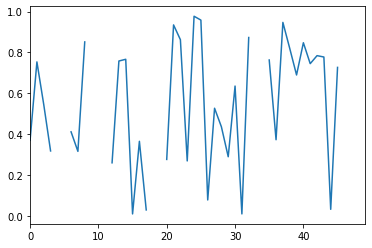

In [33]:
s = pd.Series(np.random.random(50))
s[4, 5, 9, 11, 18, 19, 33, 34, 46, 47, 48] = np.nan
s.plot()

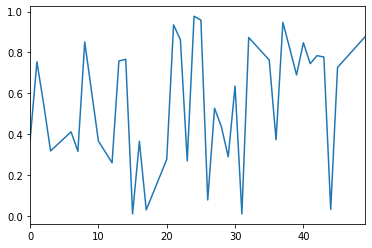

In [34]:
s.interpolate().plot()

### Datawig
This method works very well with categorical and non-numerical features. It is a library that learns Machine Learning models using Deep Neural Networks to impute missing values in a dataframe. 

In [35]:
# Very very slow on original data
import datawig
#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['First Name', 'Salary', 'Bonus %', 
 'Team', 'col_int', 'col_float'], # column(s) containing information about the column we want to impute
    output_column='Gender', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(Employees)
#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(Employees)
imputed.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3509: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

2020-12-26 05:42:48,922 [INFO]  
========== start: fit model
2020-12-26 05:42:48,924 [WARNING]  Already bound, ignoring bind()
2020-12-26 05:42:49,458 [INFO]  Epoch[0] Batch [0-25]	Speed: 806.70 samples/sec	cross-entropy=0.743372	Gender-accuracy=0.500000
2020-12-26 05:42:49,913 [INFO]  Epoch[0] Train-cross-entropy=0.694973
2020-12-26 05:42:49,914 [INFO]  Epoch[0] Train-Gender-accuracy=0.540816
2020-12-26 05:42:49,915 [INFO]  Epoch[0] Time cost=0.988
2020-12-26 05:42:49,927 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2020-12-26 05:42:50,027 [INFO]  Epoch[0] Validation-cross-entropy=0.610335
2020-12-26 05:42:50,030 [INFO]

,First Name,Gender,Salary,Bonus %,Senior Management,Team,Date_of_Birth,col_date,col_int,col_float,Salary_Fill0,Gender_FillNoGender,Salary_FillMean,Salary_FillMedian,Salary_GenderGroup,Gender_FillMode,Salary_ForwardFill,Salary_ForwardFillLimit,Salary_ForwardFillVar,Salary_BackFill,Salary_BackwardFillVar,Salary_fFill_bFill_Avg,Salary_replace,Salary_mice,Salary_Interpolate,Salary_Interpolate_linear,Gender_imputed,Gender_imputed_proba
0,Douglas,Male,97308.0,6.945,True,Marketing,1990-10-19,1994-03-01,NaN,0.139211,97308.0,Male,97308.000000,97308.0,97308.0,Male,97308.0,97308.0,97308.0,97308.0,97308.0,97308.0,97308.0,97308.000000,97308.0,97308.0,Male,0.997784
1,Thomas,Male,61933.0,NaN,True,NaN,2000-07-30,1992-11-30,1774.0,0.923773,61933.0,Male,61933.000000,61933.0,61933.0,Male,61933.0,61933.0,61933.0,61933.0,61933.0,61933.0,61933.0,61933.000000,61933.0,61933.0,Male,0.999137
2,Maria,Female,130590.0,11.858,False,Finance,1999-06-22,1999-01-08,1008.0,0.733971,130590.0,Female,130590.000000,130590.0,130590.0,Female,130590.0,130590.0,130590.0,130590.0,130590.0,130590.0,130590.0,130590.000000,130590.0,130590.0,Female,0.999666
3,Jerry,Male,NaN,9.340,True,Finance,1990-01-29,1990-04-23,4581.0,0.670253,0.0,Male,90522.329648,90370.0,89854.0,Male,130590.0,130590.0,61933.0,101004.0,101004.0,115797.0,0.0,90522.329648,115797.0,115797.0,Male,0.999600
4,Larry,Male,101004.0,1.389,True,Client Services,1994-11-15,1990-01-12,6336.0,0.177167,101004.0,Male,101004.000000,101004.0,101004.0,Male,101004.0,101004.0,101004.0,101004.0,101004.0,101004.0,101004.0,101004.000000,101004.0,101004.0,Male,0.969191


In [36]:
import datawig

df = datawig.utils.generate_df_string( num_samples=200, 
                                       data_column_name='sentences', 
                                       label_column_name='label')

df_train, df_test = datawig.utils.random_split(df)

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['sentences'], # column(s) containing information about the column we want to impute
    output_column='label', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(df_train)

#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(df_test)
imputed.head()

,sentences,label,label_imputed,label_imputed_proba
57,bccnR Rz1TH vEJgw JsThJ iWgNZ 2mpbU,iWgNZ,iWgNZ,1.0
31,q6ITZ fRWi4 O67IM SlgE2 PFTP5 6nGis,6nGis,6nGis,1.0
65,bIBNg O67IM F03vp YwfuN iWgNZ Wa0RH,iWgNZ,iWgNZ,1.0
140,RwL85 RK3Ac SlgE2 IripW PFTP5 6nGis,6nGis,6nGis,1.0
89,bIBNg VfvVc DOBx3 uanaT YRk2k iWgNZ,iWgNZ,iWgNZ,1.0


### MissForest

In [37]:
#pip install misspy for installation
from missingpy import MissForest
miss_imputer = MissForest()
Employees_MissImputed = pd.DataFrame(miss_imputer.fit_transform(numerical_features),columns = numerical_features.columns)
Employees_MissImputed.head()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


,Salary,Bonus %,col_int,col_float,Salary_Fill0,Salary_FillMean,Salary_FillMedian,Salary_GenderGroup,Salary_ForwardFill,Salary_ForwardFillLimit,Salary_ForwardFillVar,Salary_BackFill,Salary_BackwardFillVar,Salary_fFill_bFill_Avg,Salary_replace
0,97308.00,6.94500,6411.06,0.139211,97308.0,97308.000000,97308.0,97308.0,97308.0,97308.0,97308.0,97308.0,97308.0,97308.0,97308.0
1,61933.00,11.01035,1774.00,0.923773,61933.0,61933.000000,61933.0,61933.0,61933.0,61933.0,61933.0,61933.0,61933.0,61933.0,61933.0
2,130590.00,11.85800,1008.00,0.733971,130590.0,130590.000000,130590.0,130590.0,130590.0,130590.0,130590.0,130590.0,130590.0,130590.0,130590.0
3,91968.43,9.34000,4581.00,0.670253,0.0,90522.329648,90370.0,89854.0,130590.0,130590.0,61933.0,101004.0,101004.0,115797.0,0.0
4,101004.00,1.38900,6336.00,0.177167,101004.0,101004.000000,101004.0,101004.0,101004.0,101004.0,101004.0,101004.0,101004.0,101004.0,101004.0


In [38]:
Employees.head()

,First Name,Gender,Salary,Bonus %,Senior Management,Team,Date_of_Birth,col_date,col_int,col_float,Salary_Fill0,Gender_FillNoGender,Salary_FillMean,Salary_FillMedian,Salary_GenderGroup,Gender_FillMode,Salary_ForwardFill,Salary_ForwardFillLimit,Salary_ForwardFillVar,Salary_BackFill,Salary_BackwardFillVar,Salary_fFill_bFill_Avg,Salary_replace,Salary_mice,Salary_Interpolate,Salary_Interpolate_linear
0,Douglas,Male,97308.0,6.945,True,Marketing,1990-10-19,1994-03-01,NaN,0.139211,97308.0,Male,97308.000000,97308.0,97308.0,Male,97308.0,97308.0,97308.0,97308.0,97308.0,97308.0,97308.0,97308.000000,97308.0,97308.0
1,Thomas,Male,61933.0,NaN,True,NaN,2000-07-30,1992-11-30,1774.0,0.923773,61933.0,Male,61933.000000,61933.0,61933.0,Male,61933.0,61933.0,61933.0,61933.0,61933.0,61933.0,61933.0,61933.000000,61933.0,61933.0
2,Maria,Female,130590.0,11.858,False,Finance,1999-06-22,1999-01-08,1008.0,0.733971,130590.0,Female,130590.000000,130590.0,130590.0,Female,130590.0,130590.0,130590.0,130590.0,130590.0,130590.0,130590.0,130590.000000,130590.0,130590.0
3,Jerry,Male,NaN,9.340,True,Finance,1990-01-29,1990-04-23,4581.0,0.670253,0.0,Male,90522.329648,90370.0,89854.0,Male,130590.0,130590.0,61933.0,101004.0,101004.0,115797.0,0.0,90522.329648,115797.0,115797.0
4,Larry,Male,101004.0,1.389,True,Client Services,1994-11-15,1990-01-12,6336.0,0.177167,101004.0,Male,101004.000000,101004.0,101004.0,Male,101004.0,101004.0,101004.0,101004.0,101004.0,101004.0,101004.0,101004.000000,101004.0,101004.0


In [39]:
['First Name',
 'Gender',
 'Salary',
 'Bonus %',
 'Senior Management',
 'Team',
 'col_int',
 'col_float',
 'col_date']

['First Name',
 'Gender',
 'Salary',
 'Bonus %',
 'Senior Management',
 'Team',
 'col_int',
 'col_float',
 'col_date']